Authors: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from summary import groupLevel

This script will import raw data from AUX and build a local database containing only essential files for further preprocessing. You can select where to store these file by changing `localPath`.

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
datapath = 'C:/Users/au646069/ECG/1_VPN_aux/'
subList = os.listdir(datapath)

### Data quality

**HRD**
* Subject 44, 45, 46, 74, 141, 191, 249: data missing

*Logs:*
* Subject 27: rename file (28->27)
* Subject 81: incorrect file name (081)
* Subject 191, 223: data missing, but should be present

*To remove:*
* Subject 36: invalid responses -> remove
* Subject 54: noisy PPG -> remove
* Subject 67: invalid responses
* Subject 84: bad confidence ratings -> remove
* Subject 143: half of the task has invalid ppg signal

**HBC**
* Subject 160, 177, 202, 223: data missing

*Logs:*
* Subject 187: data missing but should be present.
* Subject 21, 31, 44, 45, 49, 50, 62, 223: missing data?
* Subject 25, 41: incomplete (crash?)

**HRD2**
* Subject 20, 21, 29, 30, 36, 40, 41, 43, 48, 51, 54, 55, 62, 69, 75, 77, 88, 91, 105, 110, 111, 129, 155, 158, 182, 199, 205, 221, 227, 239, 256: data missing

*Logs:*
* Subject 123: data missing but should be present.

- Remove subject 139 (psychiatric symptoms)

In [3]:
group_df, merged_df = groupLevel(datapath=datapath, subjects=subList, verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Drop bad data

In [4]:
remove = ['sub_0036', 'sub_0054', 'sub_0067', 'sub_0084', 'sub_0139', 'sub_0143']
for sub_rm in remove:
    group_df = group_df[group_df.Subject != sub_rm]
    merged_df = merged_df[merged_df.Subject != sub_rm]

In [5]:
group_df = group_df[group_df.Session == 'Del1']
group_df.to_csv(path + '/data/behavior.txt')
merged_df = merged_df[merged_df.Session == 'Del1']
merged_df.to_csv(path + '/data/merged.txt')

## Task descriptive stats

In [6]:
group_df = pd.read_csv(path + '/data/behavior.txt')

In [7]:
print(f'Number of participants: {len(group_df.Subject.unique())}')
del1 = len(group_df[group_df.Session=='Del1'].Subject.unique())
print(f'Del 1: {del1}')

Number of participants: 213
Del 1: 213


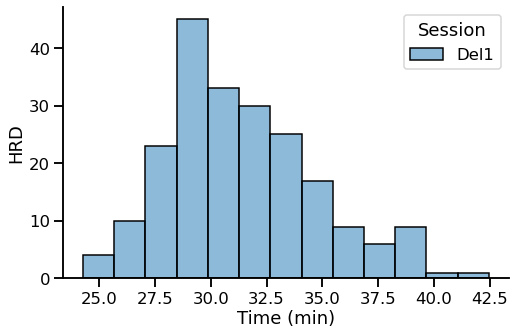

In [8]:
sns.set_context('talk')
plt.figure(figsize=(8, 5))
sns.histplot(data=group_df[group_df.Modality=='Intero'],
             x='TaskDuration', hue='Session')
plt.xlabel('Time (min)')
plt.ylabel('HRD')
sns.despine()

In [14]:
print(f'Task mean time: {round(group_df.TaskDuration.mean(), 2)} min')
print(f'Task std time: {round(group_df.TaskDuration.std(), 2)} min')
print(f'Task max time: {round(group_df.TaskDuration.max(), 2)} min')
print(f'Task min time: {round(group_df.TaskDuration.min(), 2)} min')

Task mean time: 31.38 min
Task std time: 3.34 min
Task max time: 42.46 min
Task min time: 24.27 min
